# Project: Investigate a Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis
    <ul>
        <li><a href="#question1">Question 1</a></li>
        <li><a href="#question2">Question 2</a></li>
        <li><a href="#question3">Question 3</a></li>
        <li><a href="#question4">Question 4</a></li>
        <li><a href="#question5">Question 5</a></li>
        <li><a href="#question6">Question 6</a></li>
    </ul>
 </a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analysis, the intention is investigate the movie database from TMDb which contains information about 10,000 movies collected from its Database. The dataset collected is from the year 1960 to 2015. The following questions were attempted for analysis 

**Questions**
* Which properties are related to highest profit?
* Which genres produces the highest profit? 
* Does the movie with higher budget have have a higher vote count and vote average? 
* Is there an increment in the profitabilty level over the years ?
* What is the level of popularity yields high revenue?
* What are the increments on the average cost of production of movie over the years?

>**The movie dataset has the following features:-**  
>* id - This is the movie id from the initial dataset.  
>+ imdb_id - This is the id in reference to IMDB Website.
>+ popularity - A numeric quantity specifying the movie popularity.
>+ budget - The amount in Dollar which the movie was made.
>+ revenue - The amount in Dollars which the movie fetched.
>+ original_title - The title of the movie before translation or adaptation.
>+ cast - The actors/actress that took part in the movie.
>+ homepage - A link to the homepage of the movie.
>+ director - A person who is in charge of making a film and tells the actors/actress how to play their parts.
>+ tagline - A short text which serves to clarify an idea for, or is designed with a form of, dramatic effect.
>+ keywords - The keywords or tags related to the movie.
>+ overview - A brief description of the movie.
>+ runtime - The total time for the movie to run in minutes.
>+ genre - The style or category of the movie i.e Action, Comedy ,Thriller etc.
>+ production_companies - The production house of the movie.
>+ release_date - The date on which it was released.
>+ vote_count - The count of votes recieved.
>+ vote_average - The average ratings the movie recieved.
>+ release_year - The year which the movie was released
>+ budget_adj - The budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>+ revenue-adj - The revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
# imported packages used in this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> This section will load the data, trim and clean it. The data will also be checked for duplicates and null values which would be fixed if found for consistency in result and analysis. There are some values that are zeros, e.g budget_adj, these data would be dropped accordingly. 

### General Properties

In [2]:
#loaded the data from the csv file using pandas dataframe
df = pd.read_csv('tmdb-movies.csv') # the read_csv was used to read the csv file
df.head() #shows the first 5 rows of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape #shows the number of rows and columns in the dataset 

(10866, 21)

In [4]:
df.describe() # shows some general statistics about the movie dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info() #describes information about the columns, its data types, row entries in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.duplicated().sum() # reveals how many duplicates exist in the dataset

1

In [7]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
df[df['id']== 42194] #search the dataset for the duplicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> The information above clearly described the dataset. It was observed that some of the row values are missing. Equally, some of the columns that are not required for the analysis should be dropped. The duplicates needs to be removed.The data types of the columns needs to be checked for missed matched datatypes. Some of the rows in revenue_adj and budget_adj are zero values which does not add value during analysis, hence should be removed. There are null values in the dataset which should also be removed.

### Data Cleaning (Trim, Clean and Validate Datatypes and Structure of the Movie Database )

The movie database has some columns not required for the analysis. The following are the columns dropped from the database   
* id - There is another id column known as imdb_id
* budget - There is an adjusted budget considering inflation in dollars to 2010.
* revenue - There is an adjusted revenue considering inflation in dollars to 2010.
* cast - It is not required in the anaylsis.
* homepage, director, tagline,keywords, overview - They are not required in the anaylsis.


In [10]:
# create a new data frame and drop the columns not need for the analysis
df_new = df.drop(['id', 'budget', 'revenue','cast', 'homepage', 'director', 'tagline', 'keywords','overview','production_companies'], axis = 1)
df_new.head() # check the first 5 values of the new dataframe to confirm the columns have been droped

,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df_new.shape #confirm the new dataframe has reduced columns compared to the original dataframe

(10866, 11)

In [12]:
# check the database info to eliminate null values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         10856 non-null  object 
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   runtime         10866 non-null  int64  
 4   genres          10843 non-null  object 
 5   release_date    10866 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [13]:
# genres have some null values, hence it is best to drop those row values
df_new.dropna(inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         10835 non-null  object 
 1   popularity      10835 non-null  float64
 2   original_title  10835 non-null  object 
 3   runtime         10835 non-null  int64  
 4   genres          10835 non-null  object 
 5   release_date    10835 non-null  object 
 6   vote_count      10835 non-null  int64  
 7   vote_average    10835 non-null  float64
 8   release_year    10835 non-null  int64  
 9   budget_adj      10835 non-null  float64
 10  revenue_adj     10835 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1015.8+ KB


In [14]:
#check and drop duplicated values
df_new.duplicated().sum()

1

In [15]:
df_new.drop_duplicates(inplace=True) # drop duplicates
df_new.duplicated().sum() #check duplicates again

0

In [16]:
#drop zero row values that have zero revenue and budget.
#df_new = df_new.loc[~((df_new['budget_adj'] == 0) | (df_new['revenue_adj'] == 0))]
df_new.drop(df_new[(df_new['budget_adj'] == 0) |(df_new['revenue_adj'] == 0) ].index, inplace=True)

In [17]:
df_new.shape

(3854, 11)

In [18]:
#change the data types of budget_adj and revenue_adj to integer
df_new = df_new.astype({"revenue_adj":'int64',"budget_adj":'int64'})

In [19]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         3854 non-null   object 
 1   popularity      3854 non-null   float64
 2   original_title  3854 non-null   object 
 3   runtime         3854 non-null   int64  
 4   genres          3854 non-null   object 
 5   release_date    3854 non-null   object 
 6   vote_count      3854 non-null   int64  
 7   vote_average    3854 non-null   float64
 8   release_year    3854 non-null   int64  
 9   budget_adj      3854 non-null   int64  
 10  revenue_adj     3854 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 361.3+ KB


In [20]:
#check for null values
df_new.isnull().sum()

imdb_id           0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [21]:
#breif statistical description of the dataset
df_new.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,0.000000e+00,2.000000e+00
25%,0.462367,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
#there is still budget with zero
df_new[df_new['budget_adj']==0]

,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3581,tt1436559,0.52043,"Love, Wedding, Marriage",90,Comedy|Romance,6/3/11,55,5.3,2011,0,1335


In [23]:
df_new.drop(3581, inplace=True)

In [24]:
df_new.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03
mean,1.191728,109.225279,527.842979,6.168388,2001.258500,4.425147e+07,1.371003e+08
std,1.475314,19.922999,880.038066,0.794900,11.282948,4.480940e+07,2.161281e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,1.000000e+00,2.000000e+00
25%,0.462287,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07
50%,0.797723,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07
75%,1.368403,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis



> Lets view the histogram of some of the attributes in the dataset

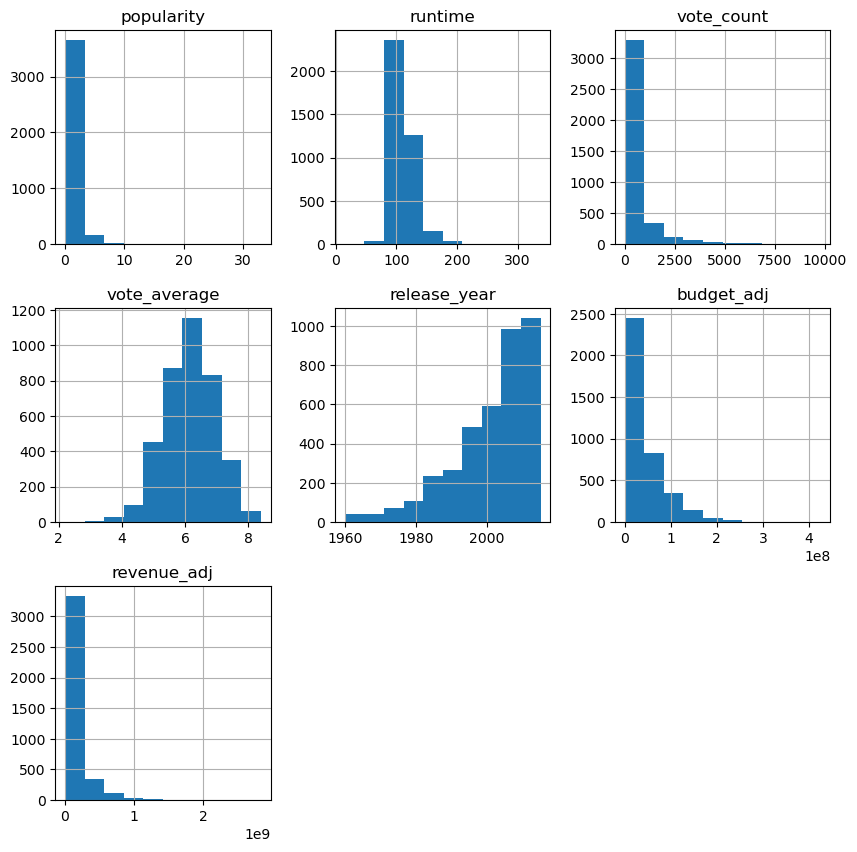

In [25]:
df_new.hist(figsize=(10,10)); 

<a id='question1'></a>
### Question 1
###  Which properties are related to highest profit?

In [26]:
#let create the profit column in the dataset assuming revenue_adj is not the gross revenue

df_new['profit']= df_new['revenue_adj'].subtract(df_new['budget_adj'])

In [27]:
df_new.head(3) #checking the profit column is created

,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,tt0369610,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,1254445953
1,tt1392190,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,210161353
2,tt2908446,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,170419070


In [28]:
highest_profit_margin = df_new.profit.median() #calculate the cut off margin for highest profit
highest_profit_margin

27375780.0

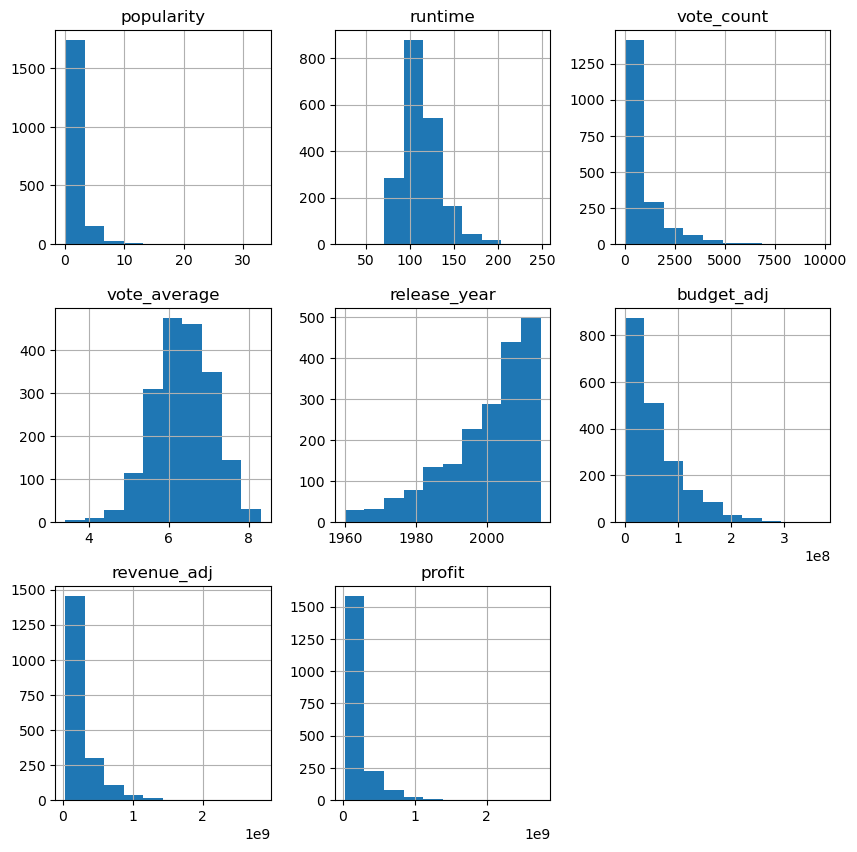

In [29]:
#splice the dataframe to contain only movies with the highest profit 
df_highest_profit = df_new.query('profit > @highest_profit_margin')
df_highest_profit.hist(figsize=(10,10));

In [30]:
df_highest_profit.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1.926000e+03,1.926000e+03,1.926000e+03
mean,1.683421,112.360332,861.003115,6.366407,1999.873832,5.776407e+07,2.481036e+08,1.903395e+08
std,1.871520,20.845304,1105.768248,0.740963,12.471231,5.009433e+07,2.606605e+08,2.363300e+08
min,0.010335,26.000000,10.000000,3.400000,1960.000000,2.240000e+02,2.938659e+07,2.745198e+07
25%,0.733828,97.000000,190.250000,5.900000,1993.000000,2.155226e+07,9.165491e+07,5.651257e+07
50%,1.203341,109.000000,469.000000,6.400000,2003.000000,4.162841e+07,1.603155e+08,1.075211e+08
75%,1.973761,124.000000,1041.000000,6.900000,2010.000000,8.026173e+07,3.063029e+08,2.233128e+08
max,32.985763,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


In [31]:
df_highest_profit.corr(numeric_only=True) # view the correlation co-efficient of all the variables of the movies 
                                          # with the highest profits 

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000000,0.214117,0.750578,0.321136,0.251380,0.376222,0.480260,0.449956
runtime,0.214117,1.000000,0.295561,0.410793,-0.109831,0.333245,0.294367,0.254035
vote_count,0.750578,0.295561,1.000000,0.412769,0.317040,0.501211,0.595778,0.550873
vote_average,0.321136,0.410793,0.412769,1.000000,-0.149927,0.007811,0.247459,0.271280
release_year,0.251380,-0.109831,0.317040,-0.149927,1.000000,0.228359,-0.053633,-0.107559
budget_adj,0.376222,0.333245,0.501211,0.007811,0.228359,1.000000,0.559116,0.404710
revenue_adj,0.480260,0.294367,0.595778,0.247459,-0.053633,0.559116,1.000000,0.984437
profit,0.449956,0.254035,0.550873,0.271280,-0.107559,0.404710,0.984437,1.000000


 ***Popularity Vs Profit***

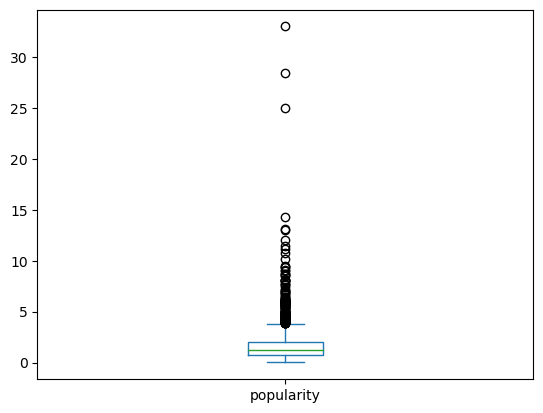

In [32]:
df_highest_profit.popularity.plot.box(); # check popularity using box plot

Popularity:
* Positive correlation between profit and popularity at 0.44
* Over(above 75%) 800 movies with high profits had popularity between 0 to 3
* hence the popularity of a movie may asertain that it will yield profit

***Runtime vs Profit***

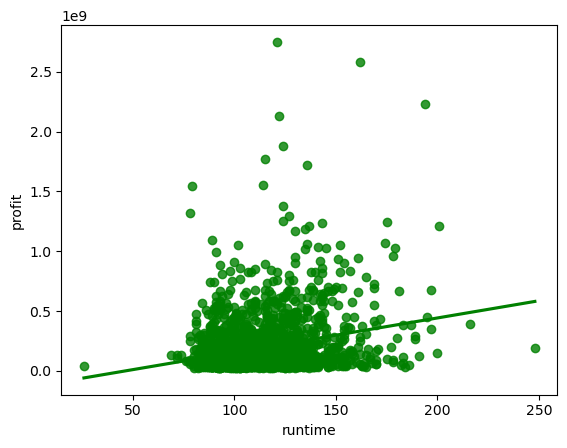

In [33]:
#plot a profit against runtime in a scatter plot showing regression line
sns.regplot(x = "runtime",
            y = "profit", 
            ci = None,
            data = df_highest_profit, color = 'green');

Runtime:
* There is weak positive correlation between the runtime and the profit   
* The correlation co-efficent is 0.25 which is not too strong.
* The average runtime for over 75% of the highest profit movies is between 90mins to 130 mins
         

***Vote_counts vs Profit***

In [34]:
df_highest_profit.vote_count.describe() #breif statistical description on vote count

count    1926.000000
mean      861.003115
std      1105.768248
min        10.000000
25%       190.250000
50%       469.000000
75%      1041.000000
max      9767.000000
Name: vote_count, dtype: float64

Vote_count:
* There is positive correlation between the vote count and the profit   
* The correlation co-efficent is 0.55 which is average.
* Based on these we can say a movie with high vote count might yeild a high profit
         

***Vote_average vs Profit***

In [35]:
vote_average_profit = df_highest_profit.vote_average.value_counts() #view the vote_average with the highest count of movies

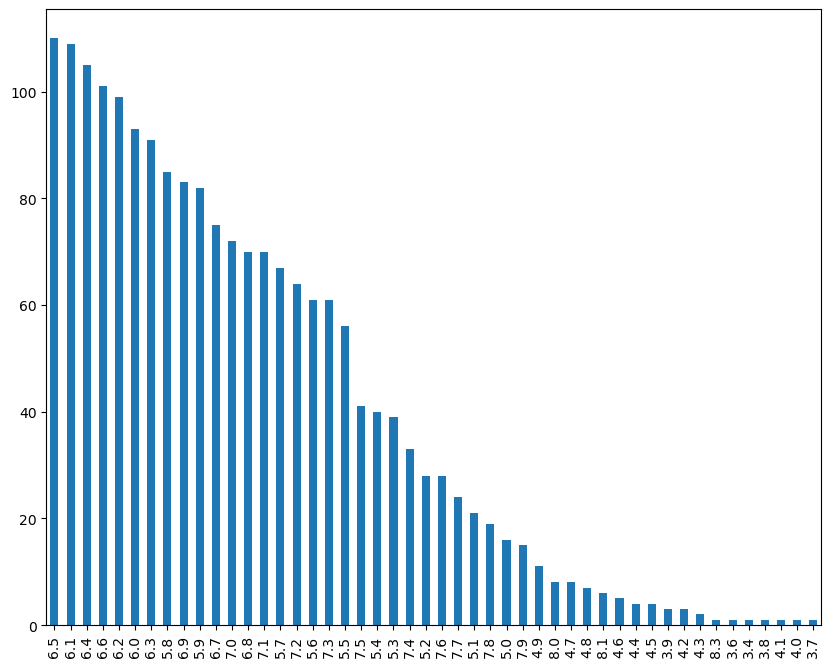

In [36]:
#plot a bar chart to show the no of movies with the highest vote average
vote_average_profit.plot.bar(figsize=(10,8));

Vote_average:
* The histogram of the vote average shows it is normal distribution curve
* This indicates that the 6.5 which is close to mean is the modal of vote average of the highest profitable movies
* Based on the counts of movies, vote_average of movies from 5.75 to 7.25 could be profitble 
         

***Release_Year vs Profit***

Release_Year:
* The histogram of the Release year shows it is left skewed distribution
* This indicates that more high profitable movies were produced made towards the 20th century

         

***Budget_adj vs Profit***

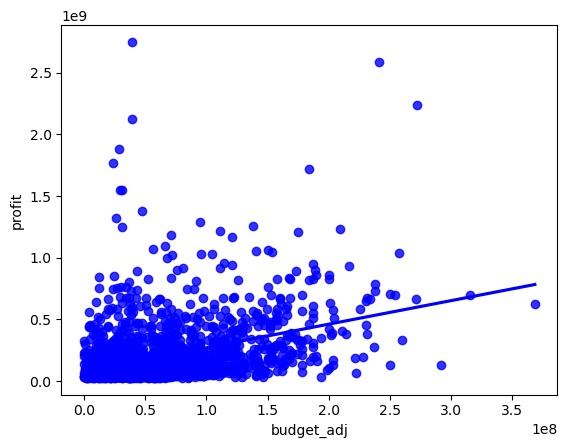

In [37]:
#plot a profit against runtime in a scatter plot showing regression line
sns.regplot(x = "budget_adj",
            y = "profit", 
            ci = None,
            data = df_highest_profit, color = 'blue');

Budget_adj:
* The histogram of the Budget_adj shows it is right skewed distribution
* This indicates that more high profitable movies(over 70%) were less than 150 million dollars
* The average mean of the budget is 57 Million dollars
* The corrolation coefficient between budget_adj and profit is positive at 0.41
* This indicates that the budget of movie is not a major factor for profit, however a high budget movie may likely yeild profit

***Revenue_adj vs Profit***

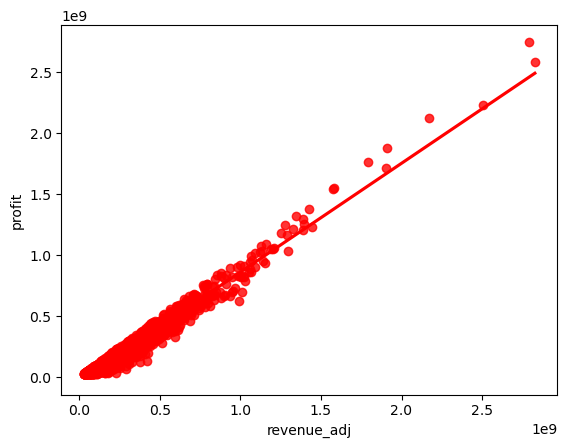

In [38]:
sns.regplot(x = "revenue_adj",
            y = "profit", 
            ci = None,
            data = df_highest_profit, color = 'red');

Revenue_adj:
* There is positive corrolation between revenue_adj and profit at 0.98
* This implies that strong indication of profit based on the revenue
* The higher the revenue, the tendency of making profit

         

<a id=question2></a>
### Question 2
###  Which genres are related to highest profit?

In [39]:
#The genres column needs to be splited into several rows for easy computation as it contains "|"
# find out the no of rows in the dataframe
df_highest_profit.shape

(1926, 12)

In [40]:
#determine the number of rows that contains "|" in the genres column
df_highest_profit['genres'].str.contains('|').sum()

1926

In [41]:
#detect which row has the highest number of "|" in the genres dataframe and use it to create the copies of the dataframe
df_highest_profit['genres'].str.count("\\|").max()

4

In [42]:
#create a copy of the dataframe
df_genres_highest_profit = df_highest_profit.copy()

In [43]:
#turn the genres column into a list
df_genres_highest_profit['genres'] = df_genres_highest_profit['genres'].apply(lambda x: x.split("|"))


In [44]:
#each item in the genres column will now form a row
df_genres_highest_profit = df_genres_highest_profit.explode('genres', ignore_index=True)

In [45]:
#check the genres with the highest profit
profit_by_genres = df_genres_highest_profit.groupby('genres').mean(numeric_only=True).profit
profit_by_genres.sort_values(ascending=False)

genres
Animation          3.074767e+08
Adventure          3.065230e+08
Fantasy            2.941875e+08
Family             2.691007e+08
Science Fiction    2.608691e+08
Action             2.375744e+08
Music              2.144035e+08
Western            1.914998e+08
War                1.854844e+08
Thriller           1.785399e+08
Romance            1.718841e+08
Comedy             1.643871e+08
Drama              1.618258e+08
Mystery            1.587181e+08
Crime              1.518465e+08
History            1.425650e+08
Horror             1.207924e+08
Foreign            6.775543e+07
Documentary        6.476600e+07
TV Movie           5.143802e+07
Name: profit, dtype: float64

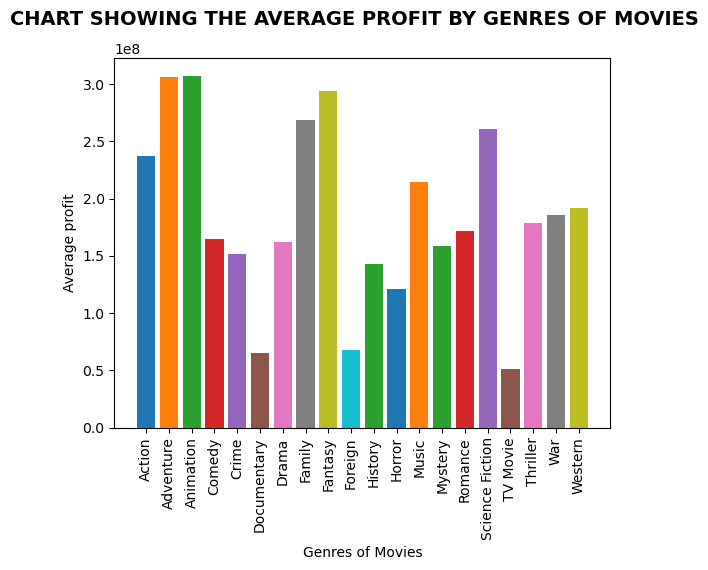

In [46]:
#plot a bar chart showing profitable movies according to genres
fig = plt.figure()
color=['C0', 'C1', 'C2', 'C3', 'C4','C5', 'C6', 'C7', 'C8', 'C9', 'C12']
plt.bar(profit_by_genres.index, profit_by_genres,  color=color)
plt.xticks(rotation = 'vertical');
plt.ylabel("Average profit");
plt.xlabel("Genres of Movies");
fig.suptitle("CHART SHOWING THE AVERAGE PROFIT BY GENRES OF MOVIES", fontsize=14, fontweight='bold');


In [47]:
#count the number of movies with high profit according to genres
number_of_profit_movies =df_genres_highest_profit.genres.value_counts()

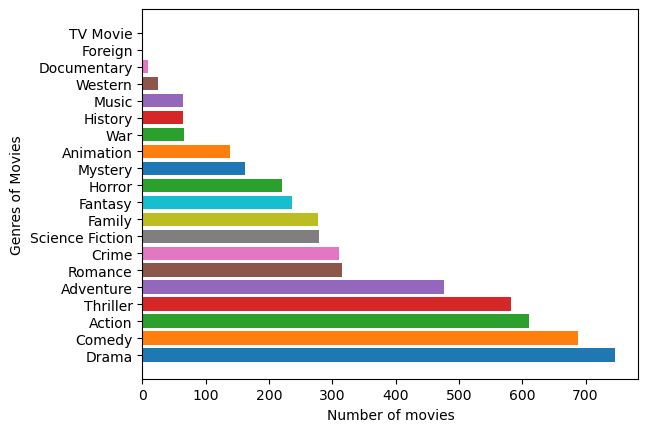

In [48]:
#plot the number of movies with high profit according to genres
plt.barh(number_of_profit_movies.index, number_of_profit_movies,  color=color)
plt.ylabel("Genres of Movies");
plt.xlabel("Number of movies");
fig.suptitle("CHART SHOWING THE AVERAGE PROFIT BY GENRES OF MOVIES", fontsize=14, fontweight='bold');

The top 3 profitable movies according to genres over the years are animations, adventure, and fantasy in order of profit.   
The top 3 genres with the highest number of profitable movies are drama, comedy, and action.

<a id=question3></a>
### Question 3
### Does the movie with higher budget have have a higher vote count and higher vote average?

In [49]:
# Use query to select two groups in the budget and get its mean vote counts
median_budget = df_new['budget_adj'].median()
low_budget = df_new.query('budget_adj < {}'.format(median_budget))
high_budget = df_new.query('budget_adj >= {}'.format(median_budget))

mean_vote_count_low = low_budget['vote_count'].mean()
mean_vote_count_high = high_budget['vote_count'].mean()

In [50]:
median_budget

30016643.0

In [51]:
#create a function to create bar chart
def createBarChart(heights,label,title,xlabel,ylabel,bar_type=0):
    locations = [1,2]
    color=['C0', 'C1']
    labelX = plt.xlabel(xlabel)
    labelY = plt.ylabel(ylabel)
    labeltitle = plt.title(title)
    if bar_type ==0:
        plotbar = plt.bar(locations, heights, tick_label=labels, color = color);
        return plotbar,labelX,labelY,labeltitle;
    else:
        plotbarh = plt.barh(locations, heights, tick_label=labels, color = color);
        return plotbarh,labelX,labelY,labeltitle; 
    

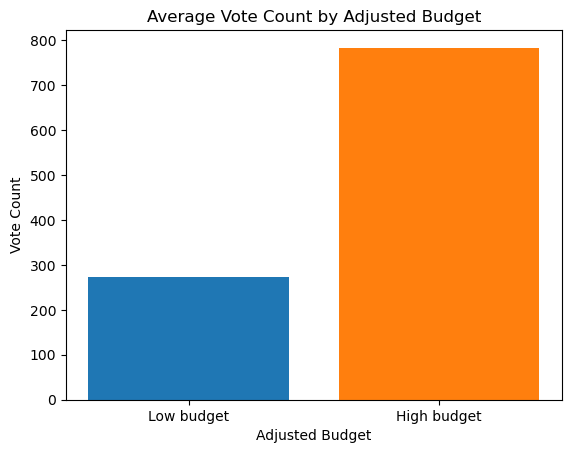

In [52]:
# Create a bar chart using the function createBarChart
heights = [mean_vote_count_low, mean_vote_count_high]
labels = ['Low budget', 'High budget']
createBarChart(heights,labels,"Average Vote Count by Adjusted Budget", "Adjusted Budget","Vote Count");

> Using the above chart, it clearly shows that movies with high budget have more vote counts than that movies with low budget

In [53]:
mean_vote_average_low = low_budget['vote_average'].mean()
mean_vote_average_high = high_budget['vote_average'].mean()

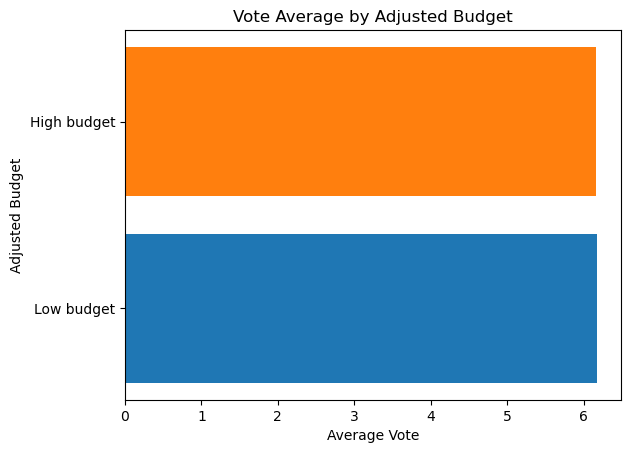

In [54]:
heights = [mean_vote_average_low, mean_vote_average_high]
labels = ['Low budget', 'High budget']
createBarChart(heights,labels,'Vote Average by Adjusted Budget','Average Vote','Adjusted Budget', bar_type=1);

> Using the above chart, it clearly shows that there is no differnce between average vote for movies with high budget to movies with low budgets

<a id=question4></a>
### Question 4
### Is there an increment in the profitabilty level over the years ?

In [55]:
#group the dataframe according to release year viewing the profit
profit_over_years = df_new.groupby('release_year').profit.sum()
profit_over_years.sort_values(ascending=False)

release_year
2015    17509565964
2012    15762759104
2014    15360299822
2013    14773174145
2011    14508683206
2009    14300047774
2010    13341222037
2007    12289908088
2008    11994810031
2004    11339547656
2002    10915916041
2003    10907799019
2005    10338765295
2001     9879052933
2006     9438969587
1997     8667304569
1999     8421410722
1995     8025002877
2000     7738025964
1998     7055200394
1994     6920674302
1993     6907075405
1996     6584937762
1989     6339277774
1977     6272042199
1992     6018807532
1990     5765885860
1973     5194465218
1991     4880325490
1988     4265061363
1967     4159569181
1987     4123233997
1982     4093921492
1984     3848463707
1985     3379081157
1978     3359748766
1986     3313067649
1983     3295076228
1975     3274711328
1981     3166214906
1974     2877058414
1979     2855318252
1965     2763255503
1980     2651502574
1970     2550224501
1976     2411772417
1972     2384284551
1961     2181770346
1964     2071667861
1971   

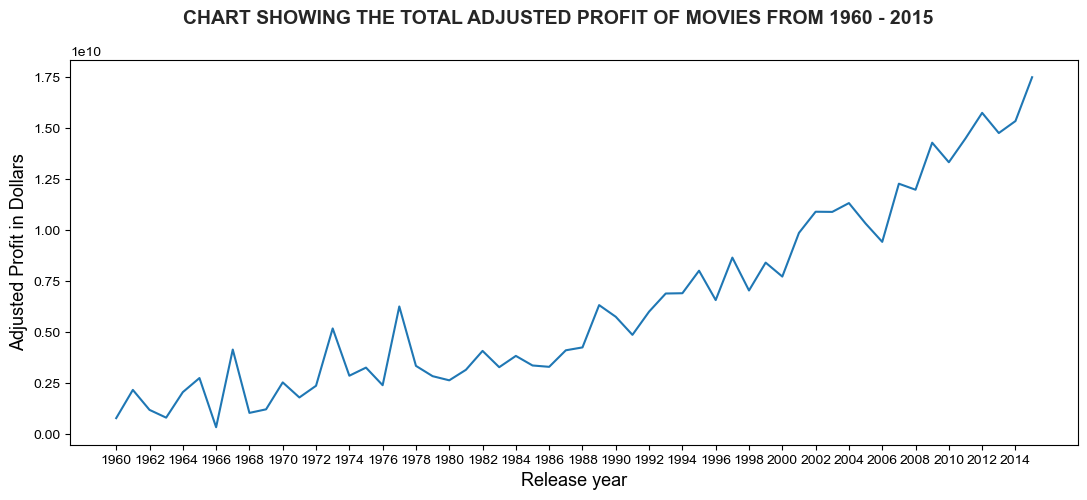

In [56]:
#plotting a line graph to visualize the sum of profits over the year
fig = plt.figure()
profit_over_years.plot(xticks = np.arange(1960,2016,2), figsize = (13,5));
sns.set_style("whitegrid")
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Adjusted Profit in Dollars',fontsize = 13);
fig.suptitle("CHART SHOWING THE TOTAL ADJUSTED PROFIT OF MOVIES FROM 1960 - 2015", fontsize=14, fontweight='bold');

From the above, it is clear that the least profit was in 1966 at approx 352.5 Million dollars while the maximum profit was in 2015 where the total profit was approx 17.5 Billion dollars. using the graph, there is clear indication that the over the years the profitabilty level of the movie industry have grown progresively although there were dips in some years.

<a id=question5></a>
### Question 5
### What is the level of popularity that yields the highest revenue and profit?

In [57]:
#view brief statictics on the popularity
df_new.describe().popularity

count    3853.000000
mean        1.191728
std         1.475314
min         0.001117
25%         0.462287
50%         0.797723
75%         1.368403
max        32.985763
Name: popularity, dtype: float64

In [58]:
#created bin edges using the above statistics
bin_edges = [0.001117, 0.462367, 0.797511,  1.368324, 32.985763] 

In [59]:
#levels of popularity which are Not Popular, Relatively Popular, Popular, and Very Popular
bin_names = ['Not Popular', 'Rel_Popular', 'Popular', 'Very Popular']

In [60]:
#create new column showing the popularity levels
df_new['popularity_level'] = pd.cut(df_new['popularity'], bin_edges, labels=bin_names)

In [61]:
#aggregiate the adjusted revenue accordingly to the popularity levels
popularity_revenue = df_new.groupby('popularity_level').mean(numeric_only=True).revenue_adj
popularity_revenue

popularity_level
Not Popular     4.012495e+07
Rel_Popular     6.959785e+07
Popular         1.241418e+08
Very Popular    3.144204e+08
Name: revenue_adj, dtype: float64

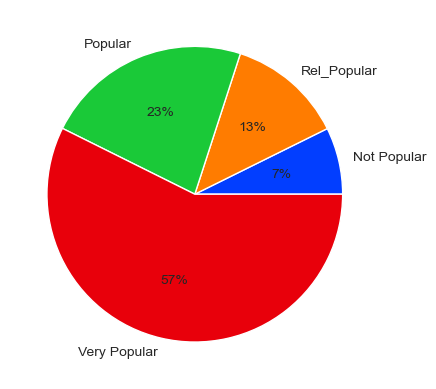

In [62]:
# defining Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting popularity level on pie chart
plt.pie(popularity_revenue, labels=bin_names, colors=palette_color, autopct='%.0f%%');

This shows 57% of movies that are very popular tends to bring higher revenue. Hence, the movies that are very popular(from 1.36 upwards) tend to have higher revenue income. To get high revenue for a movie, there is need to promote its popularity.

In [63]:
profit_median = df_new.profit.median()
profit_median

27375780.0

In [64]:
#Lets also view profit
df_high_profit = df_new[df_new['profit']>profit_median]
df_high_profit

,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level
0,tt0369610,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,1254445953,Very Popular
1,tt1392190,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,210161353,Very Popular
2,tt2908446,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,170419070,Very Popular
3,tt2488496,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129,1718723210,Very Popular
4,tt2820852,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923,1385748801,1210948878,Very Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,tt0077394,0.236193,Damien: Omen II,107,Action|Drama|Horror|Thriller,6/9/78,71,6.1,1978,22730364,88642923,65912559,Not Popular
10822,tt0061184,0.670274,Who's Afraid of Virginia Woolf?,131,Drama,6/21/66,74,7.5,1966,50385110,226643572,176258462,Rel_Popular
10828,tt0061107,0.402730,Torn Curtain,128,Mystery|Thriller,7/13/66,46,6.3,1966,20154044,87334190,67180146,Not Popular
10835,tt0060934,0.299911,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,80616176,134360293,53744117,Not Popular


In [65]:
df_high_profit.popularity_level.value_counts() #count how many movies accordingly to level of popularity

Very Popular    814
Popular         549
Rel_Popular     366
Not Popular     197
Name: popularity_level, dtype: int64

In [66]:
#group aggregate profit accordingly to level of profitablity
popularity_profit = df_high_profit.groupby('popularity_level').mean(numeric_only=True).profit
popularity_profit

popularity_level
Not Popular     1.016324e+08
Rel_Popular     1.039199e+08
Popular         1.400272e+08
Very Popular    2.845979e+08
Name: profit, dtype: float64

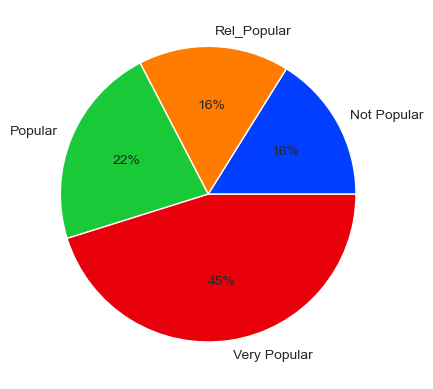

In [67]:
# defining Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting popularity level on pie chart
plt.pie(popularity_profit, labels=bin_names, colors=palette_color, autopct='%.0f%%');

From the chart, the movies that are very popular accounts for 45% of profits above approximately 27 million dollars. Also, 814 movies out of 1927 movies which gives a ratio of 0.42. This clears states it is neccesary to make efforts in making a movie popular to generate high profits

<a id=question6></a>
### Question 6
### What are the increments on the annual average cost of production of movie over the past years?

In [68]:
#let view theadjusted budget requirement for movies all over the years
df_new.budget_adj.describe()

count    3.853000e+03
mean     4.425147e+07
std      4.480940e+07
min      1.000000e+00
25%      1.309053e+07
50%      3.001664e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

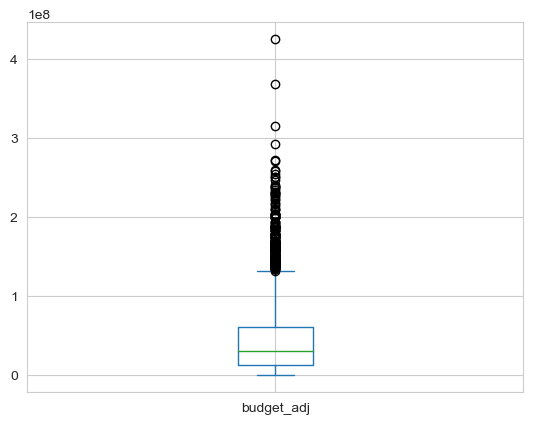

In [69]:
df_new.budget_adj.plot(kind = 'box'); #let view it on a boxplot to see th outliers

In [70]:
#let work within range of 25% quantile and 75% quantile to eliminate the outliers
Q1 = df_new['budget_adj'].quantile(0.25)
Q3 = df_new['budget_adj'].quantile(0.75)
IQR = Q3 - Q1

df_removed_outliers = df_new[~((df_new['budget_adj'] < Q1) |(df_new['budget_adj'] > Q3))]

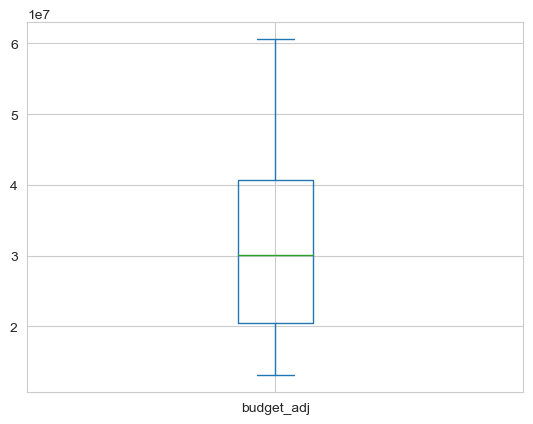

In [71]:
df_removed_outliers.budget_adj.plot(kind ='box'); #this boxplot looks appropriate to workout

In [72]:
df_removed_outliers.budget_adj.describe() #brief statistical description of the adjusted budget

count    1.931000e+03
mean     3.181685e+07
std      1.294629e+07
min      1.309053e+07
25%      2.046817e+07
50%      3.001558e+07
75%      4.072789e+07
max      6.061307e+07
Name: budget_adj, dtype: float64

In [73]:
#the aggregate of the adjusted budget grouped according to the release year
mean_year = df_removed_outliers.groupby('release_year').budget_adj.mean().astype('int64').rename('mean_year')

In [74]:
#percentage change from year to year
pctch = mean_year.pct_change().rename('pctch')
pctch = pctch * 100

In [75]:
pc_release_year = pd.concat([mean_year,pctch], axis = 1)

In [76]:
pc_release_year

,mean_year,pctch
release_year,,
1960,19661246,NaN
1961,31154730,58.457557
1962,18862107,-39.456683
1963,23140582,22.682911
1964,25722273,11.156552
1965,47751889,85.644126
1966,34040180,-28.714485
1967,23695768,-30.388829
1968,36610746,54.503310


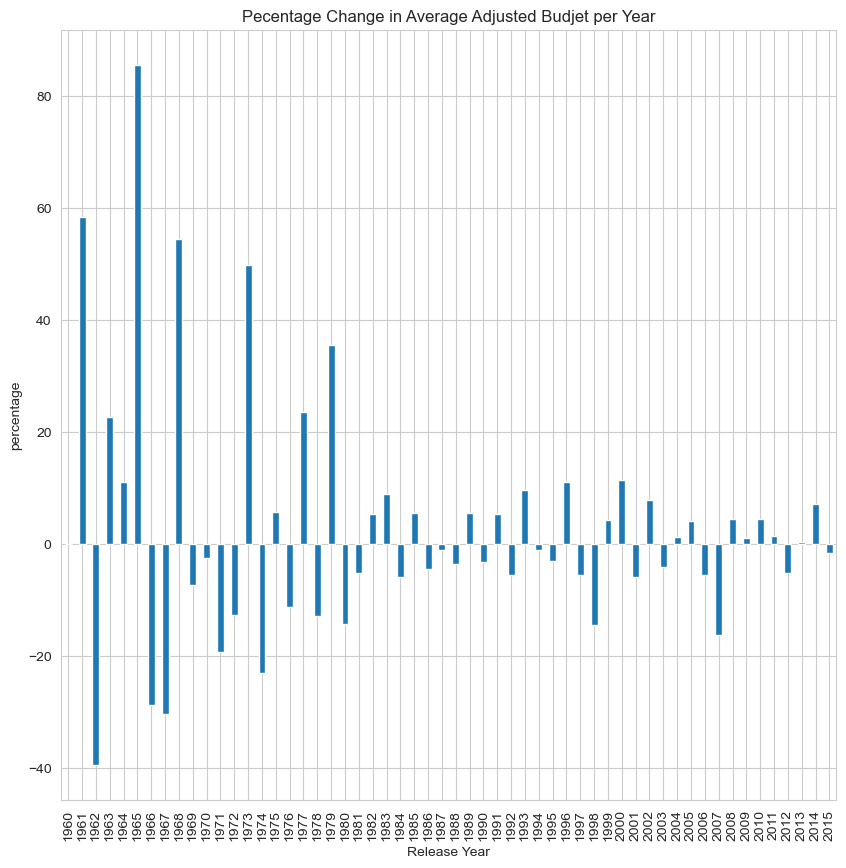

In [77]:
#plotting a bar chart showing the percentage change to the mean of adjusted budget yearly
pc_release_year.pctch.plot(kind = 'bar', figsize=(10,10));
plt.xlabel('Release Year');
plt.ylabel('percentage');
plt.title('Pecentage Change in Average Adjusted Budjet per Year');

The chart shows that there have increment and decrement on the average adjusted budget required for production. The highest negative percentage change has approximatly 39.5% in 1962 and positive percentage change has been 85% in 1965. Towards the end of the chart (from 1982 - 2015), the percentage change reduced and the variation is not much. Based on this assumption, it can be concluded that in recent years the  percentage change for the average mean cannot be less or greater than 20% to the annual average cost of production at approximatly 31.9 million dollars

<a id='conclusions'></a>
## Conclusions  
  
In regards to the dataset, using descriptive analysis cannot accurately provide answers to some of the questions, however it is concluded that:  

Some properties are related to profitabilty of a movie. These are:  
   >  * Popularity. Movies that are popular tend to yield more profits.
   >  * Runtime. The most profitable movies are between 90 - 150 mins with an average at 113mins.
   >  * vote counts. A higher vote counts tends to incline towards profitable movies.
   >  * Vote average. Vote average of movies from 5.75 to 7.25 could be profitble.
   >  * Release Year. There are indications that more movies would progress towards higher profits in coming years 
   >  * Budget. A high budget is not critical to profit but there is a small likehood that higher budget movies make profit
   >  * Revenue. The higher the revenue the more likely that movie yeilds profit, so it is essential that revenue are sourced.       
   
The top genres of movies which were profitable are animation, adventure and fantasy while the highest number of profitable movies according to genres are drama,comedy, and action. Hence a combination of the two from the categories may yeild a profitable movie.

The movies with high budget tends to have high vote counts, however there is no significant difference in case of the vote average. It can be concluded that movies with budget 30million dollars tends to have high vote counts

it can be stated that the profitabilty level of the movie industry have grown progresively although there were dips in some years. The least profit was in 1966 at approx 352.5 Million dollars while the maximum profit was in 2015 where the total profit was approx 17.5 Billion dollars.Hence, it can be predicted that the total profit will increase progressively over the coming years.

The movies that are very popular(from 1.36 upwards) tend to have higher revenue income. Also, movies that are very popular tends to be profitable. It is advisable to promote the popularity of movies as it tends to yield higher revenue and higher profit.

It can be concluded that in recent years the  percentage change for the annual adjusted budget mean cannot be less or greater than 20% to the annual average cost of production at approximatly 31.9 million dollars